# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split
# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
X_train_original, y_train_original = train['features'], train['labels']
X_test_original, y_test_original = test['features'], test['labels']
print ('Training data loaded.', X_train_original.shape, y_train_original.shape)
print ('Testing data loaded.', X_test_original.shape, y_test_original.shape)

Training data loaded. (39209, 32, 32, 3) (39209,)
Testing data loaded. (12630, 32, 32, 3) (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
### Replace each question mark with the appropriate value.

n_train = X_train_original.shape[0]

n_test = X_test_original.shape[0]

image_shape = X_train_original.shape[1:4]

unique, unique_counts = np.unique(y_train_original, return_counts=True)
n_classes = unique.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

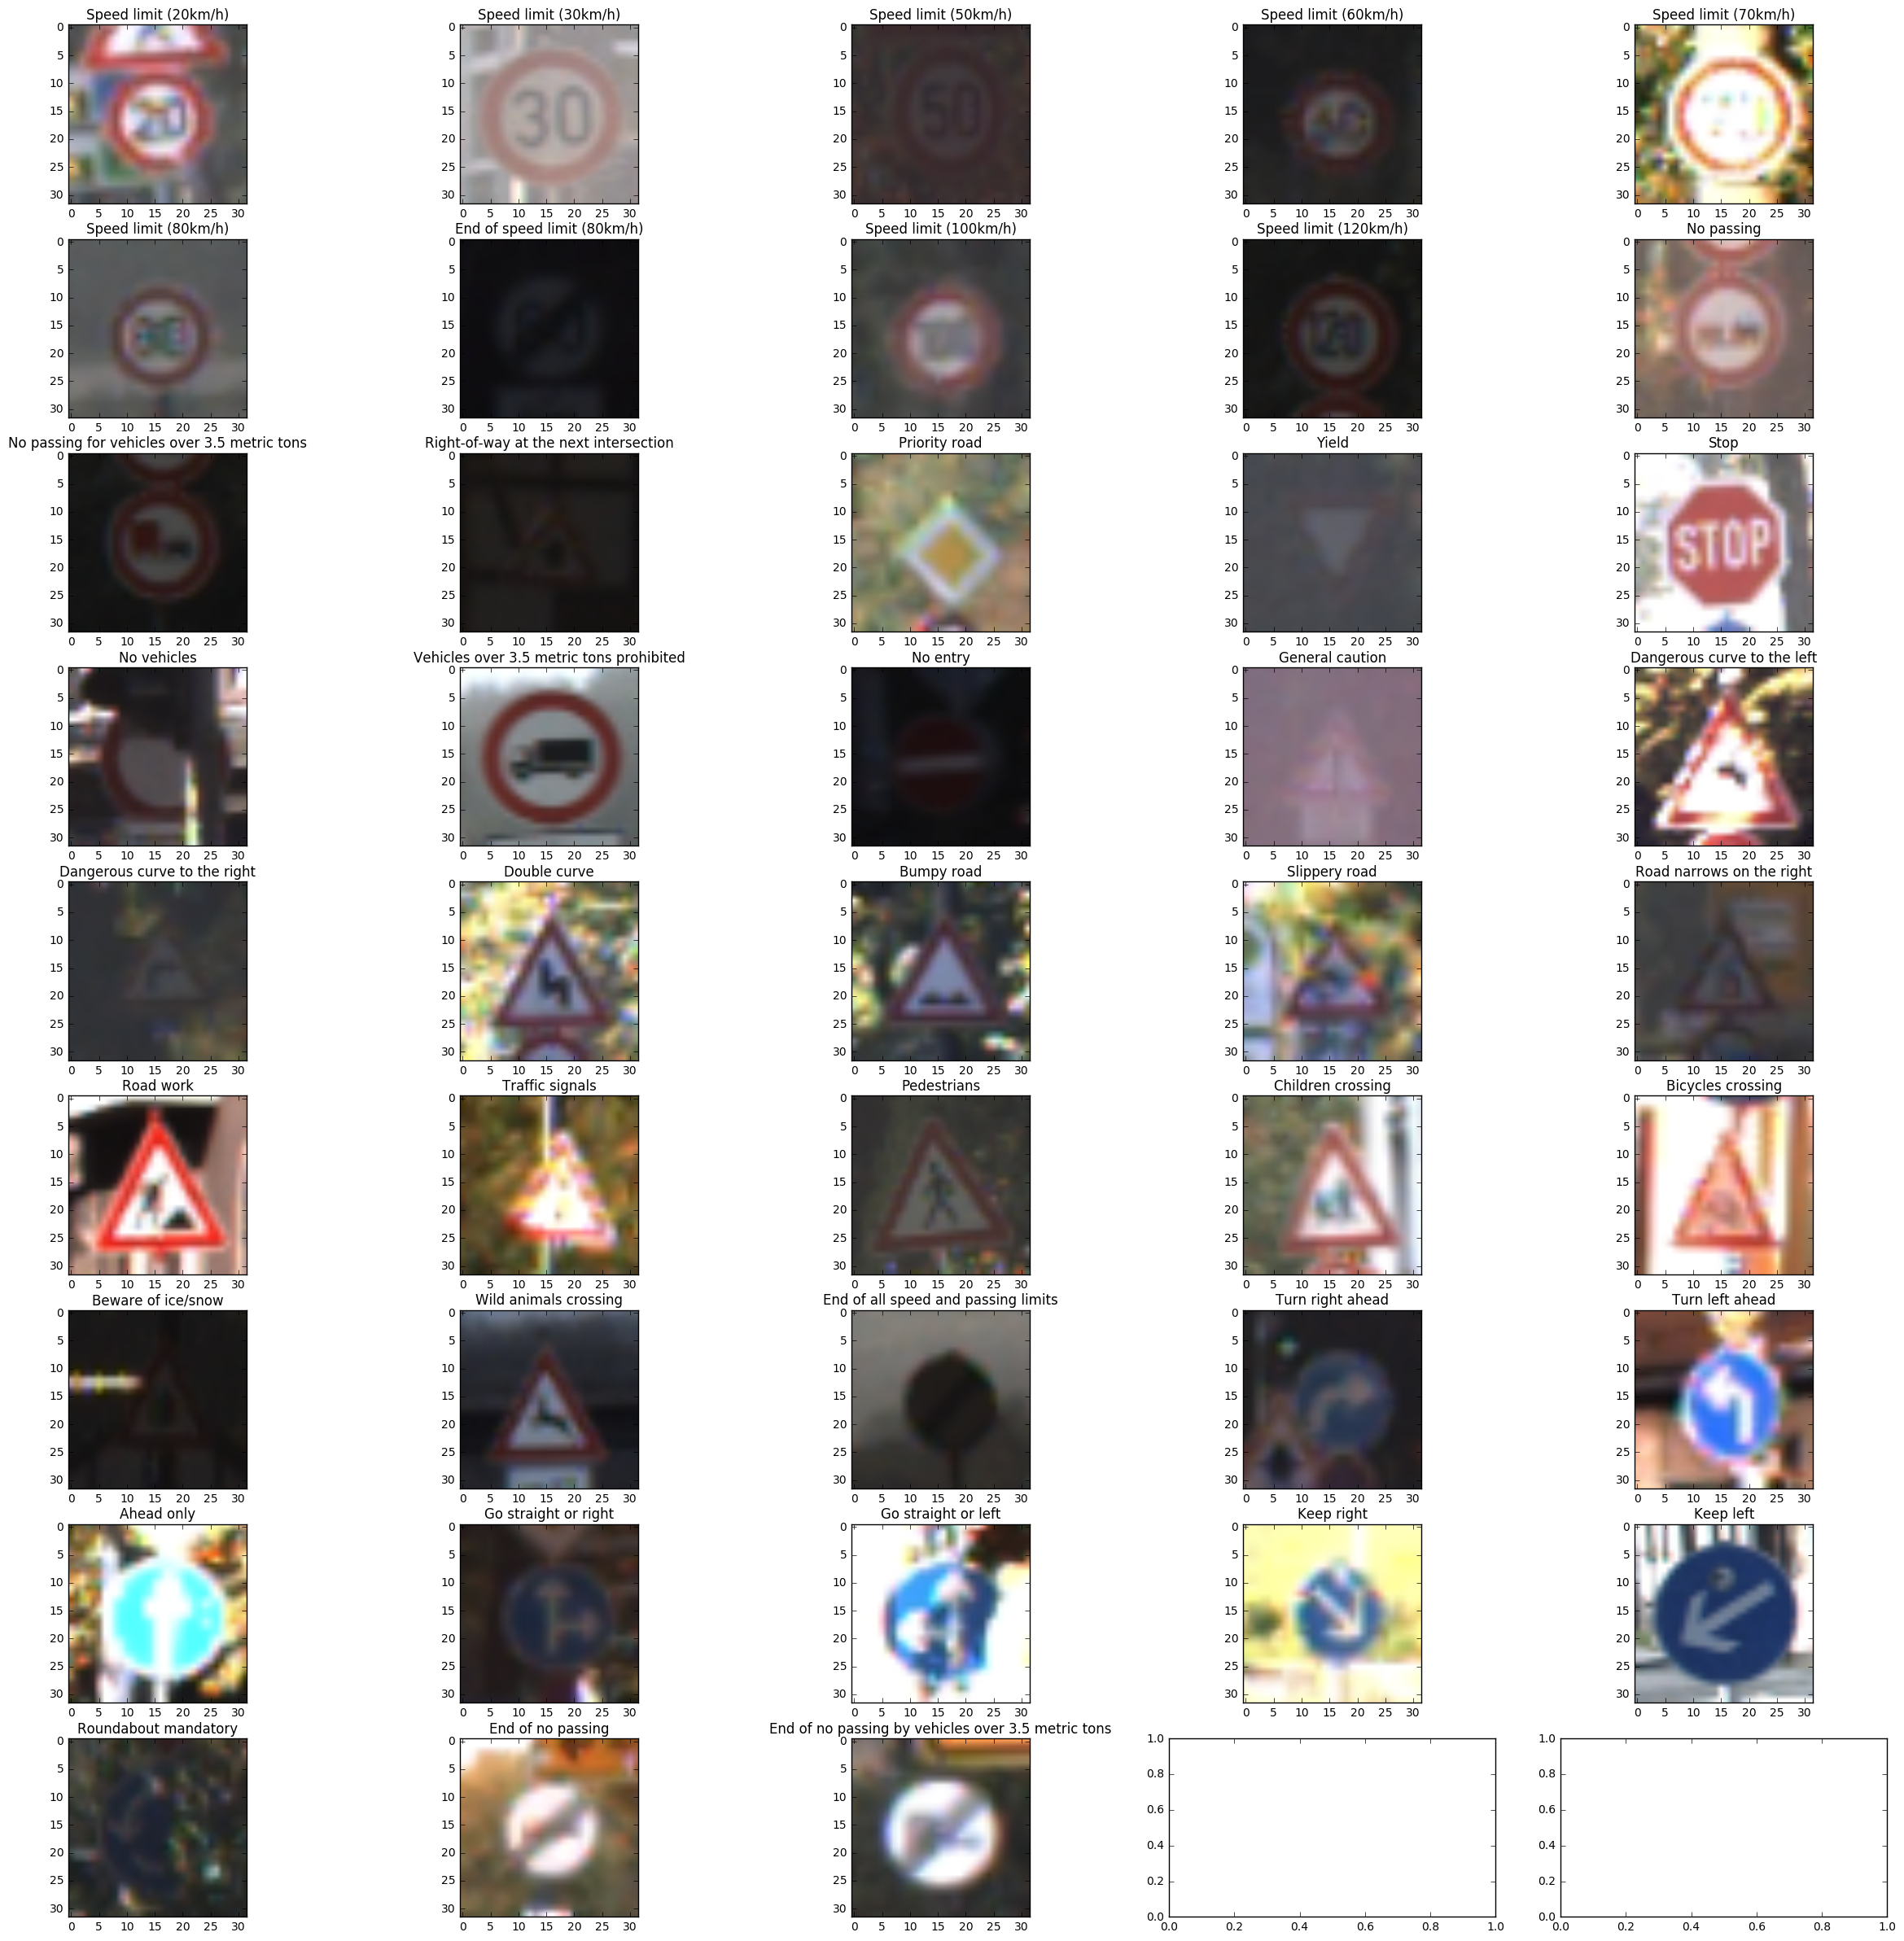

In [3]:
# X_train_original      = np.pad(X_train_original, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_test_original       = np.pad(X_test_original, ((0,0),(2,2),(2,2),(0,0)), 'constant')

### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas
%matplotlib inline

# Visualizations will be shown in the notebook.
#print an image for each label
signnames = pandas.read_csv('signnames.csv')
fig, ax = plt.subplots(11,4, figsize=[50,50])
for ClassId, SignName in zip(signnames.ClassId, signnames.SignName):
    image = X_train_original[np.argwhere(y_train_original == ClassId)[0][0]]
    row = int(ClassId/4)
    col = ClassId%4
    ax[row,col].imshow(image)
    ax[row,col].set_title(SignName)

In [4]:
# print signnames and their counts
signnames['count'] = unique_counts
signnames

,ClassId,SignName,count
0,0,Speed limit (20km/h),210
1,1,Speed limit (30km/h),2220
2,2,Speed limit (50km/h),2250
3,3,Speed limit (60km/h),1410
4,4,Speed limit (70km/h),1980
5,5,Speed limit (80km/h),1860
6,6,End of speed limit (80km/h),420
7,7,Speed limit (100km/h),1440
8,8,Speed limit (120km/h),1410
9,9,No passing,1470


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [39]:
## Transfor image

# I am using the image transformation code provided by Vivek Yadav (https://carnd-forums.udacity.com/questions/10322627/project-2-unbalanced-data-generating-additional-data-by-jittering-the-original-image#)
def transform(img,ang_range,shear_range,trans_range):
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
                                                                                                                                                                                                                                                                                                                                                                                                                
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

### Image augmentation
import random
MIN_FEATURE_PER_LABEL = 1000 # augment images to have at least N_FEATURE_PER_LABEL images per label
offset = 0
label_feature = {} # Re-organize features, labels to a dict {"label1":[feature_list]}
for label, n in zip(unique, unique_counts):
    label_feature[label] = X_train_original[offset:offset+n].tolist()
    for i in range(0, MIN_FEATURE_PER_LABEL-n):
        img = X_train_original[offset+int(n*random.random())] # pick a random picture for this label
        label_feature[label].append(transform(img,20,10,5))
    
    offset += n

# transform label_feature dict to feature and label lists
labels_train = []
features_train = []
for label,features in label_feature.items():
    features_train += features
    labels_train += [label]*len(features)
print('Done!')

generating features for label: 0
generating features for label: 1
generating features for label: 2
generating features for label: 3
generating features for label: 4
generating features for label: 5
generating features for label: 6
generating features for label: 7
generating features for label: 8
generating features for label: 9
generating features for label: 10
generating features for label: 11
generating features for label: 12
generating features for label: 13
generating features for label: 14
generating features for label: 15
generating features for label: 16
generating features for label: 17
generating features for label: 18
generating features for label: 19
generating features for label: 20
generating features for label: 21
generating features for label: 22
generating features for label: 23
generating features for label: 24
generating features for label: 25
generating features for label: 26
generating features for label: 27
generating features for label: 28
generating features for 

In [40]:
import cv2

def rgb2yuv(images):
    yuv_images = []
    for image in images:
        yuv_images.append(cv2.cvtColor(image, cv2.COLOR_RGB2YUV))
    return np.array(yuv_images)
def get_normalized_y_channel(images):
    """
    normalize image to the range of [low, high]
    """
    low = 0
    high = 1
    images = images[:,:,:,0].astype(np.float32)# get only the Y from YUV
    normalized_images = []
    for image in images:
        minumum = np.amin(image)
        maximum = np.amax(image)
        scale = (high-low)/(maximum-minumum)
        normalized_image = low + (image-minumum)*scale
        normalized_images.append(normalized_image)
        
    normalized_images = np.array(normalized_images)
    return np.reshape(normalized_images, normalized_images.shape+(1,))
    

X_test_preprocessed = rgb2yuv(X_test_original)
X_test_preprocessed = get_normalized_y_channel(X_test_preprocessed)
print(X_test_original.shape)

features_train = np.uint8(np.array(features_train))
labels_train = np.array(labels_train)
print(features_train.shape)
features_train = rgb2yuv(features_train)
features_train = get_normalized_y_channel(features_train)
print(features_train.shape)
# plt.imshow(X_train_preprocessed[10])
# features_train = X_train_preprocessed
# labels_train = y_train_original


(12630, 32, 32, 3)
(54710, 32, 32, 3)
(54710, 32, 32, 1)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
A few papers/discussions I read suggest that RGB color space often gives the best result. So I decided not to do any preprocessing for the images.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Looking at the training data set, the number of example per label vary from ~200 to ~2000. I used an image jiterring algorithm shared by Vivek to generate more examples for a label if the number of examples is low. For example, if label0 has 200 examples and we want to generate another 200 examples, we can randomly pick an existing example and get a jiterred image. Then repeart this 200 times.

After generating additional images, the new training dataset are more "balanced" and therefore I hope the bias of the trained model is reduced. 

Testing data: using the given test data
Training and validation data: During each training epoch, shuffle the training dataset and use train_test_split method to split train/validation datasets to 80/20.

In [61]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
ACTIVATION = tf.nn.relu # the activation function to tune
NUM_COLOR = 1 # number of color channels

def conv_net(x, weight_shape, padding, stride=1, mu=0, sigma=0.1):
    depth = weight_shape[3]
    weights = tf.Variable(tf.truncated_normal(shape=weight_shape, mean=mu, stddev=sigma))
    biases = tf.Variable(tf.zeros(depth))
    layer = tf.nn.conv2d(x, weights, strides=[1,stride,stride,1], padding=padding)
    layer = tf.nn.bias_add(layer, biases)
    return tf.nn.relu(layer)

def nn(x, output_size, use_activation=True, mu=0, sigma=0.1):
    shape = (x.get_shape().as_list()[1], output_size)
    weights = tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma))
    biases = tf.Variable(tf.zeros(output_size))
    logits = tf.add(tf.matmul(x, weights), biases)
    if use_activation:
        logits = tf.nn.relu(logits)
        
    return logits

def LeNet(x, keep_prob):        
    # Layer 1: Convolutional. 
    d1 = 8
    layer1 = conv_net(x, (5,5,NUM_COLOR,d1), 'SAME')
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    layer1 = tf.nn.max_pool(layer1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    # Layer 2: Convolutional. 
    d2 = 16
    layer2 = conv_net(layer1, (5,5,d1,d2), 'SAME')
    layer2 = tf.nn.max_pool(layer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
     
    # Layer 2: Convolutional. 
    d3 = 32
    layer2P = conv_net(layer2, (5,5,d2,d3), 'SAME')
    layer2P = tf.nn.max_pool(layer2P, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
     # Layer 2: Convolutional. 
    d4 = 64
    layer2PP = conv_net(layer2P, (5,5,d2,d3), 'SAME')
    layer2PP = tf.nn.max_pool(layer2PP, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    
    # Flatten.
    shape = layer2.get_shape()
    size = int(shape[1]*shape[2]*shape[3])
    flat = tf.reshape(layer2, [-1,size])

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    layer3 = nn(flat, 300)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    layer4 = nn(layer3, 120)
    layer4 = tf.nn.dropout(layer4, keep_prob=keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    layer5 = nn(layer4, n_classes, False)
    return layer5

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [62]:
### Train your model here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
EPOCHS = 40
BATCH_SIZE = 32
LEANRING_RATE = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, NUM_COLOR))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

(54710, 32, 32, 1)


In [63]:
import time
logits = LeNet(x, keep_prob)
loss = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(learning_rate = LEANRING_RATE)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# features_train = X_train_original
# labels_train = y_train_original
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    for i in range(0, EPOCHS):  
        before = time.time()
        features_train, labels_train = shuffle(features_train, labels_train)
        X_train, X_validation, y_train, y_validation = train_test_split(features_train, labels_train, test_size=0.1)
        for offset in range(0, len(X_train), BATCH_SIZE):
            batch_x, batch_y = X_train[offset:offset+BATCH_SIZE], y_train[offset:offset+BATCH_SIZE]
            session.run(training_operation, feed_dict={x:batch_x, y:batch_y, keep_prob:0.5})

        validation_accuracy = evaluate(X_validation, y_validation)
        print("Time consumed: ", int(time.time()-before))
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("test Accuracy = {:.3f}".format(evaluate(X_test_preprocessed, y_test_original)))
        print()
    saver.save(session, 'project2')
    print("Model saved.")

Time consumed:  67
EPOCH 1 ...
Validation Accuracy = 0.841
test Accuracy = 0.900

Time consumed:  70
EPOCH 2 ...
Validation Accuracy = 0.912
test Accuracy = 0.935

Time consumed:  70
EPOCH 3 ...
Validation Accuracy = 0.949
test Accuracy = 0.933

Time consumed:  73
EPOCH 4 ...
Validation Accuracy = 0.964
test Accuracy = 0.943

Time consumed:  73
EPOCH 5 ...
Validation Accuracy = 0.981
test Accuracy = 0.943

Time consumed:  72
EPOCH 6 ...
Validation Accuracy = 0.984
test Accuracy = 0.938

Time consumed:  75
EPOCH 7 ...
Validation Accuracy = 0.976
test Accuracy = 0.932

Time consumed:  71
EPOCH 8 ...
Validation Accuracy = 0.990
test Accuracy = 0.941

Time consumed:  74
EPOCH 9 ...
Validation Accuracy = 0.992
test Accuracy = 0.949

Time consumed:  74
EPOCH 10 ...
Validation Accuracy = 0.996
test Accuracy = 0.949

Time consumed:  71
EPOCH 11 ...
Validation Accuracy = 0.994
test Accuracy = 0.949

Time consumed:  72
EPOCH 12 ...
Validation Accuracy = 0.994
test Accuracy = 0.947

Time consumed

KeyboardInterrupt: 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

Optimizer: AdamOptimizer. Tried to use GradientDescentOptimizer as well but it did not produce satisfying results.
Batch size: 64. I tried batch size 256, 128 and 64 and found that 64 gave the best result.
Epochs: After some trial and error I found the test accuracy converges after ~20 epochs so chose 20.
Hyperparameters: use mu=0, sigma=0.1 for generating truncated normal distribution to initialize weights.

**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I devided this problem into several steps: preprocessing -> network model -> model architecture -> parameters -> regularization/pooling -> activation 

After some research on preprocessing images, I came to the conclusion that I don't need to do any preprocessing. 

Since we are working on an image classification problem, I found CNN is the most popular choice. 

I decided to use similar CNN architecture with the LeNet in this course. 

For training parameters, I started with a 0.001 learning rate and it worked well. Tried to increase it and the results became worse. I chose the epochs and batch size based on trial and error.

I used 2X2 max pooling. I tried to use dropout with keep_prob={0.4,0.5,0.7} and it doesn't seem to increase the final accuracy. I think maybe because the network is very small and dropout works better in larger networks.

In the [Must Know Tips/Tricks in Deep Neural Networks(http://lamda.nju.edu.cn/weixs/project/CNNTricks/CNNTricks.html), the author suggests relu is one of the best activation functions. I decided to use relu as well. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

folder = 'new-data/'
files = os.listdir(folder)
print(files)
files.remove('.DS_Store')# remove the annoying auto generated file
fig, ax = plt.subplots(3,2, figsize=[50,50])
for i in range(len(files)):
    print(i)
    image = mpimg.imread(folder + files[i])
    row = int(i/2)
    col = ClassId%2
    ax[row,col].imshow(image)
    ax[row,col].set_title(file)

['.DS_Store', 'NoEntry.png', 'RoadWork.png', 'Slip.png', 'SpeedLimit60.png', 'Stop.png', 'Yield.png']
0
1
2
3
4
5


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.